In [1]:
import matplotlib.pyplot as plt
from dolo import *
import os
from pathlib import Path

def set_cwd_to_script_or_notebook():
    try:
        # Check if running in Jupyter notebook
        if "__file__" not in globals():
            # If `__file__` is not available, assume Jupyter notebook
            notebook_dir = Path.cwd()  # Use the current notebook's directory
            print(f"Detected Jupyter environment. Setting CWD to: {notebook_dir}")
        else:
            # If `__file__` exists, use the script's directory
            notebook_dir = Path(__file__).parent.resolve()
            print(f"Detected script environment. Setting CWD to: {notebook_dir}")
        
        # Set the CWD
        os.chdir(notebook_dir)
        print("Current working directory set to:", os.getcwd())
    except Exception as e:
        print(f"Failed to set the current working directory: {e}")

# Call the function
set_cwd_to_script_or_notebook()
dolo.__file__

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Detected Jupyter environment. Setting CWD to: /Volumes/Sync/GitHub/llorracc/dolo/examples/notebooks
Current working directory set to: /Volumes/Sync/GitHub/llorracc/dolo/examples/notebooks


'/Volumes/Sync/GitHub/llorracc/dolo/dolo/__init__.py'

In [2]:
model = yaml_import("../models/consumption_savings_iid.yaml")

In [3]:
dr = time_iteration(model)

---------------------------------------------------
| Start Time Iterations.                          |
---------------------------------------------------
| N    | Error     | Gain      | Time      | nit  |
---------------------------------------------------
|    1 | 8.900e-01 |       nan | 1.225e+00 |    5 |
|    2 | 4.769e-03 | 5.359e-03 | 1.315e-02 |    4 |
|    3 | 4.795e-03 | 1.005e+00 | 8.877e-03 |    4 |
|    4 | 4.818e-03 | 1.005e+00 | 1.187e-02 |    5 |
|    5 | 4.843e-03 | 1.005e+00 | 1.045e-02 |    5 |
|    6 | 4.870e-03 | 1.006e+00 | 1.121e-02 |    5 |
|    7 | 4.894e-03 | 1.005e+00 | 1.121e-02 |    5 |
|    8 | 4.921e-03 | 1.005e+00 | 1.044e-02 |    5 |
|    9 | 4.947e-03 | 1.005e+00 | 8.715e-03 |    4 |
|   10 | 4.973e-03 | 1.005e+00 | 8.431e-03 |    4 |
|   11 | 4.999e-03 | 1.005e+00 | 1.138e-02 |    5 |
|   12 | 5.024e-03 | 1.005e+00 | 8.353e-03 |    4 |
|   13 | 5.051e-03 | 1.005e+00 | 8.204e-03 |    4 |
|   14 | 5.077e-03 | 1.005e+00 | 9.103e-03 |    4 |
|   15 | 5.1

One can also try the faster version

## Stochastic Simulations

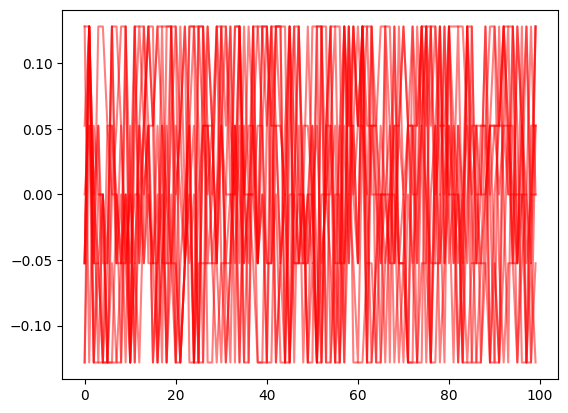

In [4]:
# Shocks are discretized as a markov chain by default:
dp = model.exogenous.discretize()
sim_shock = dp.simulate(10, 100, i0=1)
for i in range(10):
    plt.plot(sim_shock[:,i,0], color='red', alpha=0.5)

In [5]:
sim = simulate(model, dr, i0=1, N=100)

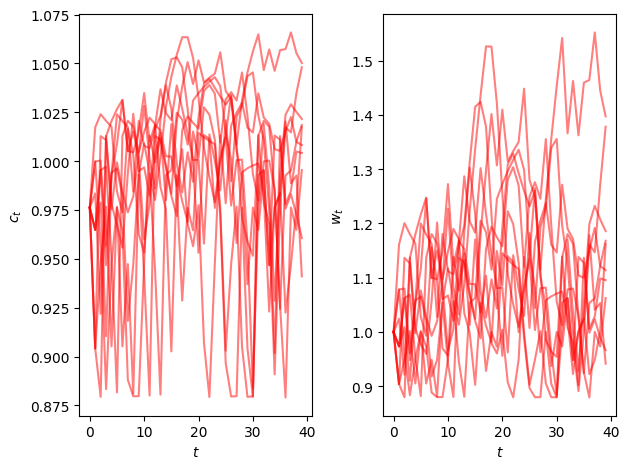

In [6]:
plt.subplot(121)
for i in range(10):
    plt.plot(sim.sel(N=i,V='c'), color='red', alpha=0.5)
plt.ylabel("$c_t$")
plt.xlabel("$t$")
plt.subplot(122)
for i in range(10):
    plt.plot(sim.sel(N=i,V='w'), color='red', alpha=0.5)
plt.xlabel("$t$")
plt.ylabel("$w_t$")

plt.tight_layout()

## Ergodic distribution

In [7]:
sim_long = simulate(model, dr, i0=1, N=1000, T=200)

In [8]:
import seaborn
seaborn.distplot(sim_long.sel(T=199, V='w'))
plt.xlabel("$w$")

ModuleNotFoundError: No module named 'seaborn'

## Plotting Decision Rule

In [20]:
tab = tabulate(model, dr,'w')

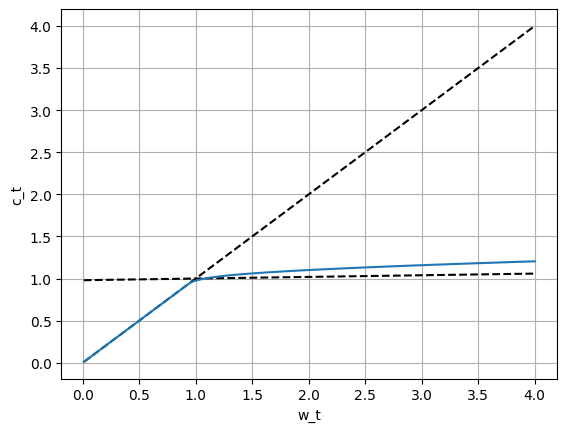

In [21]:
stable_wealth = model.eval_formula('1/r+(1-1/r)*w(0)', tab)
plt.plot(tab['w'], tab['w'],color='black', linestyle='--')
plt.plot(tab['w'], stable_wealth,color='black', linestyle='--')
plt.plot(tab['w'], tab['c'])
plt.xlabel("w_t")
plt.ylabel("c_t")
plt.grid()